# Running dynamics Simulation on Muller-Brown potential


In [1]:
from IPython.core.display import  HTML
# Jupyter display settings
display(HTML("<style>.container { width:90% !important; }</style>"))

Import general package 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Import Mullerbrown and Overdamped Langevin class 

In [3]:
from potentials.MullerBrown import MullerBrown
from simulations.UnbiasedMD import OverdampedLangevin
from simulations.UnbiasedMD import Langevin

Check if the potentil works fine 

In [4]:
pot = MullerBrown()

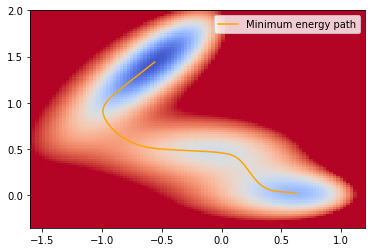

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
pot.plot_potential_heat_map(ax)
ax.plot(pot.minimum_energy_paths[0][:, 0], pot.minimum_energy_paths[0][:, 1], color='orange', label='Minimum energy path')
ax.plot(pot.minimum_energy_paths[1][:, 0], pot.minimum_energy_paths[1][:, 1], color='orange')
ax.legend()

Create simulation object

In [6]:
beta = 0.01
dt = 0.0001
unbiased_OL_on_MB = OverdampedLangevin(pot, beta, dt=dt)
x_0 = pot.minP
n_steps = 10**5

In [7]:
traj_dict = unbiased_OL_on_MB.run(x_0, n_steps, save_grad=True, save_gauss=True)

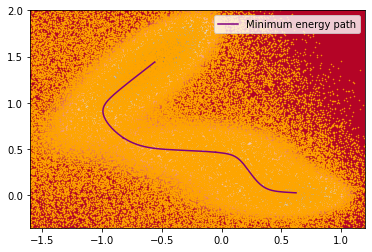

In [8]:
fig = plt.figure()
ax = fig.add_subplot()
pot.plot_potential_heat_map(ax)
ax.plot(pot.minimum_energy_paths[0][:, 0], pot.minimum_energy_paths[0][:, 1], color='purple', label='Minimum energy path')
ax.plot(pot.minimum_energy_paths[1][:, 0], pot.minimum_energy_paths[1][:, 1], color='purple')
ax.scatter(traj_dict["x_traj"][:, 0], traj_dict["x_traj"][:, 1], marker=".", color="orange", s=1)
ax.legend()

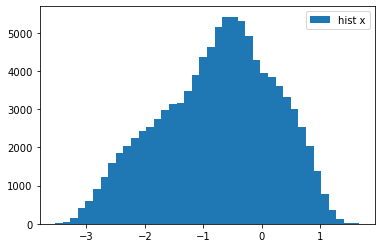

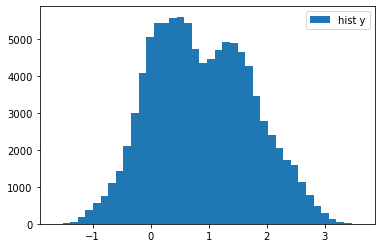

In [9]:
plt.figure()
plt.hist(traj_dict["x_traj"][:, 0], 40, label="hist x")
plt.legend()
plt.figure()
plt.hist(traj_dict["x_traj"][:, 1], 40, label="hist y")
plt.legend()

In [7]:
beta = 0.05 
dt = 0.005
m = np.array([[1., 1.]])
gamma = np.array([[10**0, 10**0]])
unbiased_Langevin_on_MB = Langevin(pot, beta, M=m, gamma=gamma, dt=dt)
x_0 = pot.minP
p_0 = np.array([[1, 1]])
n_steps = 10**5

In [8]:
traj_dict = unbiased_Langevin_on_MB.run(x_0, p_0, n_steps, save_grad=True, save_gauss=True)

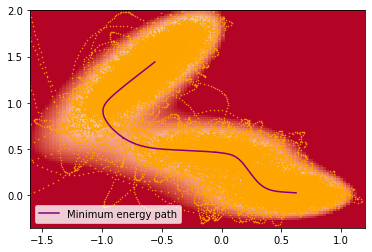

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
pot.plot_potential_heat_map(ax)
ax.plot(pot.minimum_energy_paths[0][:, 0], pot.minimum_energy_paths[0][:, 1], color='purple', label='Minimum energy path')
ax.plot(pot.minimum_energy_paths[1][:, 0], pot.minimum_energy_paths[1][:, 1], color='purple')
ax.scatter(traj_dict["x_traj"][:, 0], traj_dict["x_traj"][:, 1], marker=".", color="orange", s=1)
ax.legend()

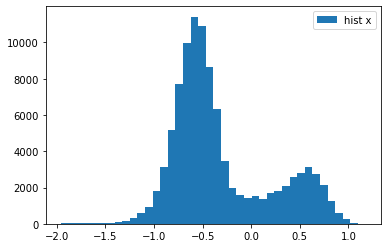

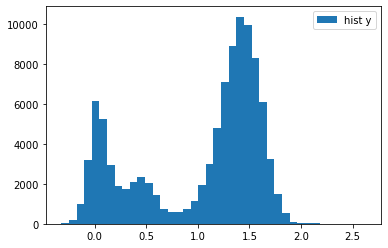

In [10]:
plt.figure()
plt.hist(traj_dict["x_traj"][:, 0], 40, label="hist x")
plt.legend()
plt.figure()
plt.hist(traj_dict["x_traj"][:, 1], 40, label="hist y")
plt.legend()